### Introduction

#### Files on the team drive - LA SCAG Region
- Network files: Mobiliti and HPCBD > LA Network > Here Map > 2021-07-30 Network - Highway & Ramp Speed Increase 
- Simulation result files: Mobiliti and HPCBD > Results > 2022-12-02 - LA Baseline 060

#### Files on the team drive -  SF Bay Area Region
- Network files: Mobiliti and HPCBD > Bay Area Network > Here Map > 2021-07-30 Network - Highway & Ramp Speed Increase
- Simulation result files:

1) UET:   Mobiliti and HPCBD > Results > 2022-02-17 - SF Baseline, UET, SOT, SOF, 0% Rerouting > 2022-02-17-sf_uet_000_legs.tgz, 2022-02-17-sf_uet_000_links.tgz


2) UET + Signals:   Mobiliti and HPCBD > Results > 2022-10-07 - SF Signals, UET 000, Wrapped and Unwrapped Metrics, All Routes > 2022-10-06-sf_uet_000_legs.tgz, 2022-10-06-sf_uet_000_links.tgz


#### General 

1) Documentation: Mobiliti and HPCBD > Documentation > 

- Mobiliti Output File Formats
- Network > Mobiliti Network 

2) Code repo for all analytics functions: https://github.com/anu-kuncheria/mobiliti-analytics/tree/main/Tools

In [ ]:
#Directory structure
# Please download the network and results file from the Team drive. 
# I have copied the scripts from the repo 'Tools' into the notebooks subdirectory. 

"""
GettingStarted/
├── data/
│   ├── network/
│   │   ├── la_link.csv
│   │   └── la_nodes.csv
│   └── results/
│       └── 2022-12-02 - LA Baseline 060/
│           ├── map/
│           │   ├── 2022-12-02-la_map_baseline_060_links/
│           │   │   └── fuel_consumption.tsv
│           │   └── 2022-12-02-la_map_baseline_060_legs
│           ├── routee
│           └── processed_data
└── notebooks/
    ├── introduction.ipynb
    ├── analytics.py
    └── plotting.py
    
"""

In [ ]:
import pandas as pd
import numpy as np
import os

#All analytics and plotting functions 
import analytics 
import plotting 


network_path =  "../data/network"
links = "la_links.csv"
nodes = "la_nodes.csv"

links_path =  "../data/results/2022-12-02 - LA Baseline 060/map/2022-12-02-la_map_baseline_060_links"
legs_path =  "../data/results/2022-12-02 - LA Baseline 060/map/2022-12-02-la_map_baseline_060_legs/legs.tsv"
fpath = "avg_flow_rates.tsv"
spath = "avg_speeds.tsv"
fupath = "fuel_consumption.tsv"

In [41]:
#road network
la_links = pd.read_csv(os.path.join(network_path,links))
la_nodes = pd.read_csv(os.path.join(network_path, nodes))
print("Network file shape:", la_links.shape, la_nodes.shape)

#links fuel results
links_fuel = read_file(os.path.join(links_path, fupath))
links_fuel_sample = links_fuel.head(100)

#legs results
legs_sample = pd.read_csv(legs_path, sep = '\t', nrows = 100)

Network file shape: (2025978, 11) (902985, 5)


In [42]:
#Road network
la_links.head(2)

,LINK_ID,ST_NAME,REF_IN_ID,NREF_IN_ID,FUNC_CLASS,DIR_TRAVEL,NUM_PHYS_LANES,SPEED_KPH,LENGTH(meters),CAPACITY(veh/hour),RAMP
0,23841635,W OLYMPIC BLVD,49251781,49251780,4,F,2.0,60,106.891438,3000.0,N
1,23841639,W OLYMPIC BLVD,49251752,49251751,4,F,3.0,60,31.343203,4500.0,N


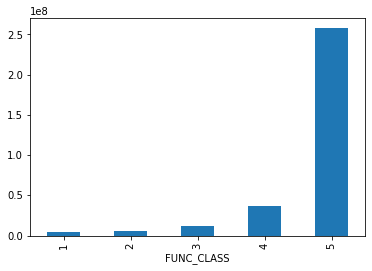

In [34]:
la_links.groupby('FUNC_CLASS')['LENGTH(meters)'].sum().plot(kind='bar');

In [35]:
#Results links - fuel
links_fuel_sample.head(2)

,link_id,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,...,21:30,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45
0,936078570,4.33309,6.43589,6.05938,38.1098,108.708,174.197,247.413,309.501,379.229,...,3.45853,3.44257,3.91851,3.48162,3.74221,3.44044,3.76528,3.37064,3.31263,3.51442
1,779426066,337.10900,501.03800,485.49800,488.4450,498.301,486.156,505.538,505.501,494.941,...,242.30900,239.29800,246.80700,247.89200,247.88800,243.02700,232.64200,255.83900,245.10800,238.55700


In [40]:
#Results legs 
legs_sample.head(2)

,leg id,person_id,mode,purpose,energy cat.,prod. cat.,start node,end node,start time (planned),start time (actual),...,duration (free),duration (congested),delay,delay ratio,original path length (m),total distance (m),total fuel consumed,total productivity consumed,reroutable,rerouted
0,0,400000000,3,-1,1,2,209038701,209038377,01:02:44:40.820,01:02:44:40.820,...,00:05:11.030,00:05:11.031,00:00:00.001,1.000000,6401.210,6401.210,0.725070,0.647981,0,0
1,1,400000001,3,-1,1,2,209038419,209038436,01:04:18:45.119,01:04:18:45.119,...,00:00:19.620,00:00:19.619,-00:00:00.001,0.999968,217.996,217.996,0.015437,0.040873,0,0


In [ ]:
# Adding geometry to  visualise in Kepler
la_links_geom = links_geom(la_links,la_nodes)
la_links_geom.to_csv("../data/processed_data/la_links_geom.csv", index = False)

links_fuel_sample_geom = kepler_geom(links_fuel_sample, la_links, la_nodes)
links_fuel_sample_geom.to_csv("../data/processed_data/la_fuelsample_geom.csv", index = False)

nodespath = os.path.join(network_path, nodes)
legs_sample_geom = kepler_legs(legs_sample, nodespath)
legs_sample_geom.to_csv("../data/processed_data/la_legsample_geom.csv", index = False)

In [43]:
la_links_geom.head(2)

,LINK_ID,ST_NAME,REF_IN_ID,NREF_IN_ID,FUNC_CLASS,DIR_TRAVEL,NUM_PHYS_LANES,SPEED_KPH,LENGTH(meters),CAPACITY(veh/hour),RAMP,ref_lat,ref_long,nref_lat,nref_long
0,23841635,W OLYMPIC BLVD,49251781,49251780,4,F,2.0,60,106.891438,3000.0,N,34.05241,-118.28540,34.05243,-118.28656
1,23841639,W OLYMPIC BLVD,49251752,49251751,4,F,3.0,60,31.343203,4500.0,N,34.05240,-118.29038,34.05241,-118.29072
